# Bike Share Assignment

## Problem Statement and Business Objective

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Reading Data

In [119]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
# Reading data using pandas and checking top 5 rows
bike_data=pd.read_csv('day.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Inspecting various aspects of data

In [121]:
bike_data.shape

(730, 16)

In [122]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [123]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no null values in any of the columns

In [124]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Hndling and Understanding Data

Column instant can be removed as it is not useful and just a row index,

Since "dteday" column is date and there are already columns for each year, month, we can drop this column

In [125]:
# dropping instant, dteday columns
bike_data.drop(['instant','dteday'], axis='columns',inplace=True)

Since temp is actual atmospheric temperature and 'atemp' is temperature felt by user, taking one of them into consideration and dropping 'atemp' column.

Also casual, registered columns whose sum reperesent total count of bikes can be dropped.

In [126]:
# dropping 'atemp','casual','registered'
bike_data.drop(['atemp','casual','registered'],axis='columns',inplace=True)

In [127]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


#### Handling categorical variables

In [128]:
# replacing numberic values of categorical variables with string values for better understanding

bike_data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
bike_data.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
bike_data.mnth.replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',
                        7:'jul',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'},inplace=True)
bike_data.weekday.replace({0: 'sunday',1: 'monday',2: 'tuesday',3: 'wednesday',4: 'thursday',5: 'friday',
                           6: 'saturday'}, inplace=True)

bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,monday,1,moderate,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tuesday,1,moderate,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wednesday,1,good,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thursday,1,good,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,friday,1,good,9.305237,43.6957,12.522300,1600


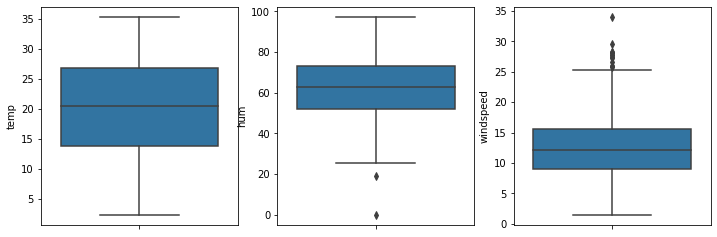

In [129]:
# checking for outliers in numerical variables
# Drawing box plots for numeric variables
num_col= ['temp','hum', 'windspeed']
plt.figure(figsize=(12,4))
i = 1
for col in num_col:
    plt.subplot(1,3,i)
    sns.boxplot(y=col, data=bike_data)
    i+=1

There are no extreme values and there numeric variables seems okay.

#### Visualising Data for better understanding

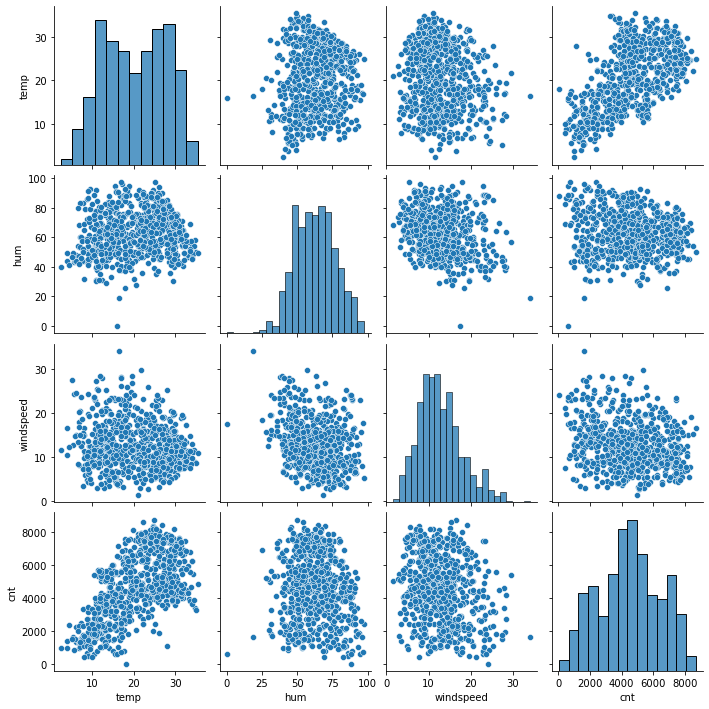

In [130]:
#plotting pairplots for numerica variables using seaborn

sns.pairplot(bike_data[['temp','hum','windspeed','cnt']])

We can observe from above piarplot that 'temp' is lineary related with dependent variable 'cnt'

<AxesSubplot:>

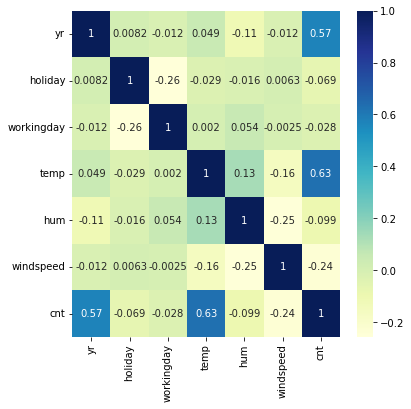

In [131]:
#plotting heatmap to see correlation between variables
plt.figure(figsize=(6,6))
sns.heatmap(bike_data.corr(),cmap='YlGnBu',annot=True)

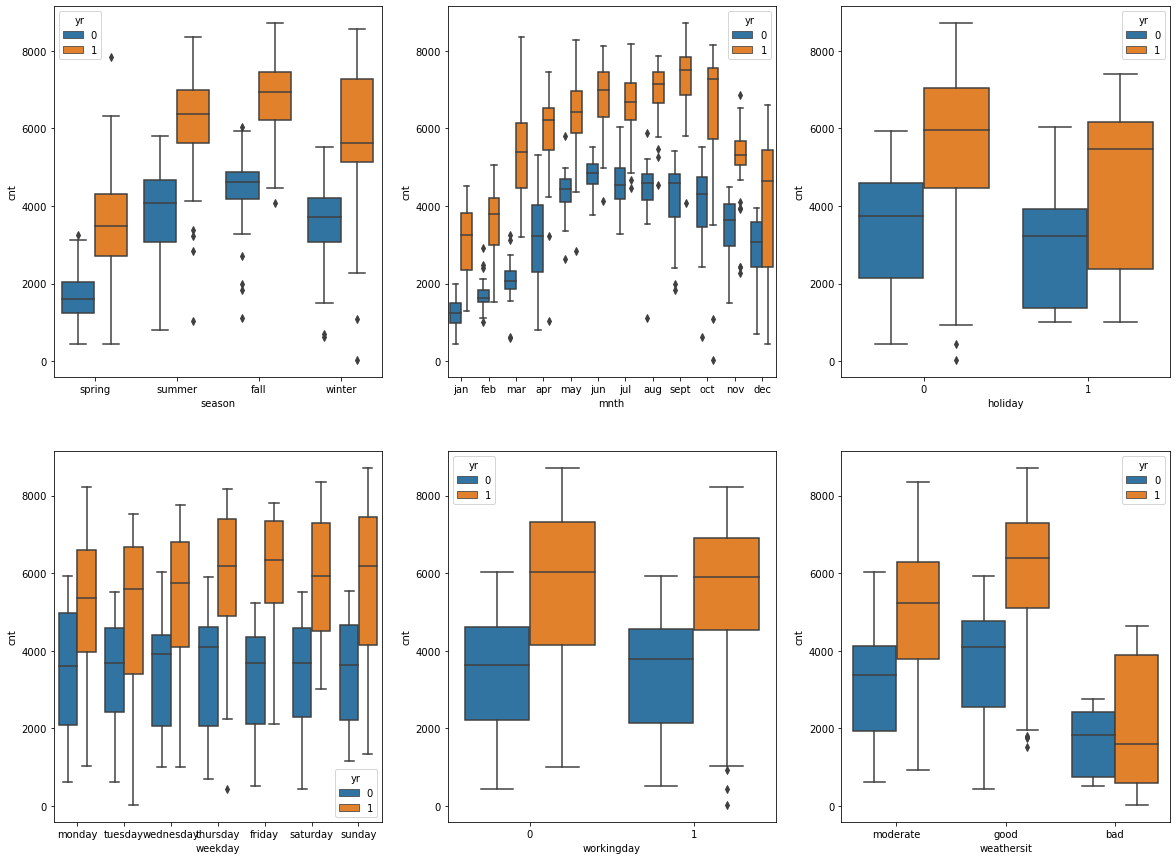

In [132]:
#plotting box plot for categorical variables

cat_col= ['season','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(20, 15))
for i in enumerate(cat_col):
    plt.subplot(2,3,i[0]+1)
    sns.boxplot(data=bike_data, x=i[1], y='cnt',hue='yr')
plt.show()

From above box plots we can observe that

Fall and Summer seasons have significantly high demand compared to other two seasons.
Seasonal demand pattern is also reflected in terms of months also.
Median demand is higer if it is not holiday.
Median Demand is higer when weather is good or moderate. And median demand is significantly lower if weather is bad.

## Data Preperation for Model Building

### Dummy Variables

In [133]:
# Creating dummy variables for all categorical variables
# Dropping first_column as n-1 dummy variables can explain n categories

bike_data=pd.get_dummies(data=bike_data,columns=['season','mnth','weekday','weathersit'],drop_first=True)

In [134]:
bike_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## Splitting the Data into training and test sets

In [135]:
#importing the libraries and splitting data in 70:30 ratio

from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test=train_test_split(bike_data, train_size=0.7, test_size=0.3, random_state=100)

#### Rescaling the feature using MinMaxScaler

In [136]:
# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_var=['temp','hum','windspeed','cnt']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_train[num_var]=scaler.fit_transform(df_train[num_var])


In [137]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [138]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.627451,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.483958,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [139]:
# Dividing df_train to X and Y sets for model bulding

y_train=df_train.pop('cnt')
X_train=df_train

## Model Building using RFE

In [140]:
# importing libraries

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [141]:
# Building a linear regression model

lm=LinearRegression()
lm.fit(X_train,y_train)
    

LinearRegression()

In [142]:
# using RFE for selection of  12 variables
rfe=RFE(estimator=lm,n_features_to_select=12)
rfe=rfe.fit(X_train,y_train)

In [143]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 12),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 16),
 ('mnth_mar', False, 17),
 ('mnth_may', False, 9),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 14),
 ('mnth_sept', True, 1),
 ('weekday_monday', False, 11),
 ('weekday_saturday', False, 7),
 ('weekday_sunday', False, 8),
 ('weekday_thursday', False, 15),
 ('weekday_tuesday', False, 10),
 ('weekday_wednesday', False, 13),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [144]:
# columns selected by RFE
train_col=X_train.columns[rfe.support_]
train_col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weathersit_good', 'weathersit_moderate'],
      dtype='object')

### Using Stats model for manual elimination and detialed statistics

In [145]:
# importing stats model api
import statsmodels.api as sm

In [146]:
# using function to create linear model using statsmodel 
def lr(train_col):
    X_train_lr= sm.add_constant(X_train[train_col]) #Assigning columns selected by RFE and adding a constant using stats model
    lr_model=sm.OLS(y_train,X_train_lr).fit()       # building linear model
    print(lr_model.summary())                       #Printing summary of the built model
    return lr_model

In [147]:
# Calculating the VIFs for the model using a fuction

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(train_col):
        vif = pd.DataFrame()
        X = X_train[train_col]
        vif['Features'] = X.columns
        vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        print(vif)

### Model - 1 : Using the 12 variables selectedy by RFE

In [148]:
# building the model and calculating vif using the user defined functions
lr(train_col) 

vif(train_col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          1.69e-190
Time:                        15:19:38   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0459    

In this model summary, we can observe that the constant has a high p-value and all other variables have p-value less than 0.05.
Some of the features have high vif values.

plotting heat map to check for correlations

<AxesSubplot:>

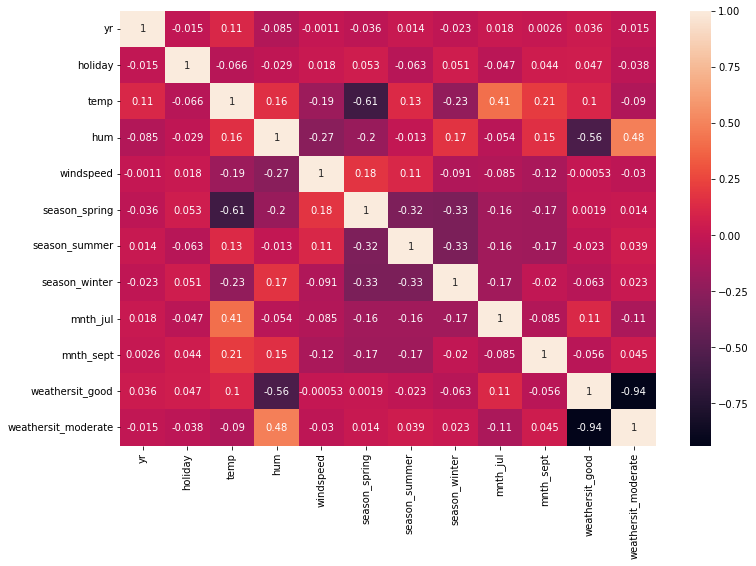

In [149]:
plt.figure(figsize=(12,8))
sns.heatmap(X_train[train_col].corr(),annot=True)

### Model - 2 : Dropping humidity variable with very high VIF

In [150]:
# dropping the hum building the model again
train_col=train_col.drop('hum')
lr(train_col)
vif(train_col)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          2.40e-187
Time:                        15:19:40   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0855    

After dropping humidity feature, there no significatn drop in R-squared and Adj R-Squared values. Also p-value of constant has dropped  to less tahn 0.05.

<AxesSubplot:>

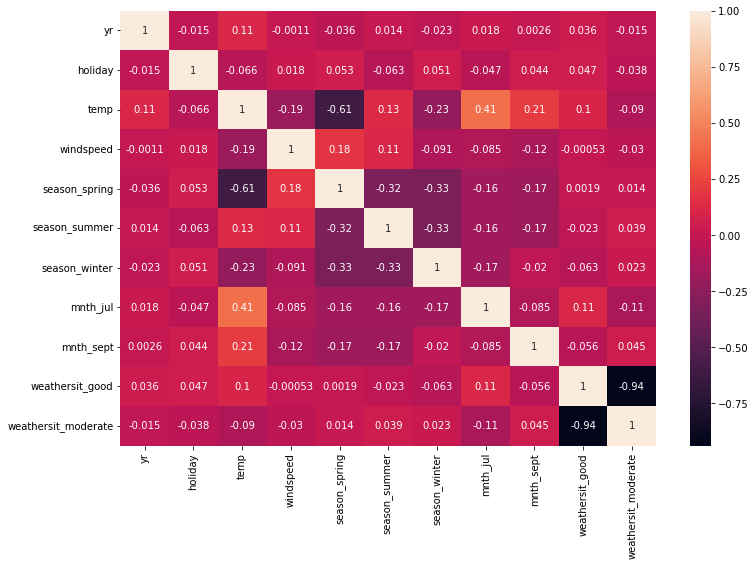

In [151]:
plt.figure(figsize=(12,8))
sns.heatmap(X_train[train_col].corr(),annot=True)

### Model - 3 : Dropping wathersit_good variable

In [152]:
# dropping the wathersit_good  as it has very high vif value and building the model again
train_col=train_col.drop('weathersit_good')
lr(train_col)
vif(train_col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     189.9
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          5.44e-163
Time:                        15:19:42   Log-Likelihood:                 438.78
No. Observations:                 510   AIC:                            -855.6
Df Residuals:                     499   BIC:                            -809.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1872    

### Model - 4 : Dropping windspeed variable

In [153]:
# dropping the windspeed variable which has negative coefficient and building the model again
train_col=train_col.drop('windspeed')
lr(train_col)
vif(train_col)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     191.7
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          7.34e-156
Time:                        15:19:42   Log-Likelihood:                 419.20
No. Observations:                 510   AIC:                            -818.4
Df Residuals:                     500   BIC:                            -776.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1266    

<AxesSubplot:>

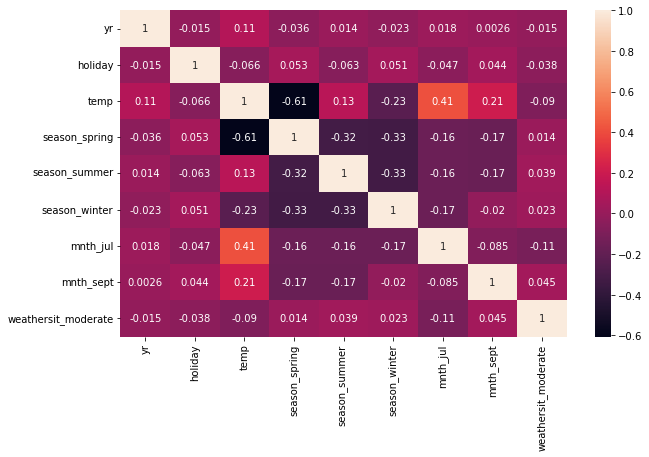

In [154]:
plt.figure(figsize=(10,6))
sns.heatmap(X_train[train_col].corr(),annot=True)

### Model - 5 : Dropping 'season_spring'

In [155]:
# dropping the season_spring and building the model again
train_col=train_col.drop('season_spring')
lr(train_col)
vif(train_col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     211.5
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          2.86e-155
Time:                        15:19:44   Log-Likelihood:                 415.03
No. Observations:                 510   AIC:                            -812.1
Df Residuals:                     501   BIC:                            -774.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0426    

### Model - 6 : Dropping month of july

Dropping month of july as it has p-value very near to 0.05

In [156]:
# dropping the mnth_july  and building the model again
train_col=train_col.drop('mnth_jul')
lr(train_col)
vif(train_col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     239.7
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          1.31e-155
Time:                        15:19:44   Log-Likelihood:                 413.00
No. Observations:                 510   AIC:                            -810.0
Df Residuals:                     502   BIC:                            -776.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0472    

There is no significant drop in R-squared and adj.R-sqaured values. All features have p-values less than 0.05
Also VIF values are less than 5 for all features.

This model seems good and able to explian 77 percent variance in the data which is good.

Prob(F-static) is zero , which indicates the model fit is not by chance and model is good to go.

#### Considering model - 6 as final model

In [157]:
# final model
lr_model=lr(train_col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     239.7
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          1.31e-155
Time:                        15:19:44   Log-Likelihood:                 413.00
No. Observations:                 510   AIC:                            -810.0
Df Residuals:                     502   BIC:                            -776.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0472    

## Residual Analysis of Train Data

Check for error terms are normally distributed, which is the assumption of linear regression.

In [158]:
#Pridicting y-train values using the model
X_train_lr=sm.add_constant(X_train[train_col])

y_train_pred = lr_model.predict(X_train_lr)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

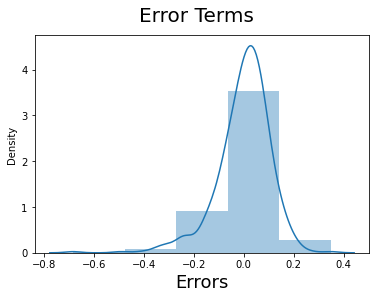

In [159]:
# plotting histogram for error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred),bins=5)
fig.suptitle('Error Terms', fontsize = 20)    
plt.xlabel('Errors', fontsize = 18)               

We can see that error terms are normally distributed with mean value of Zero.

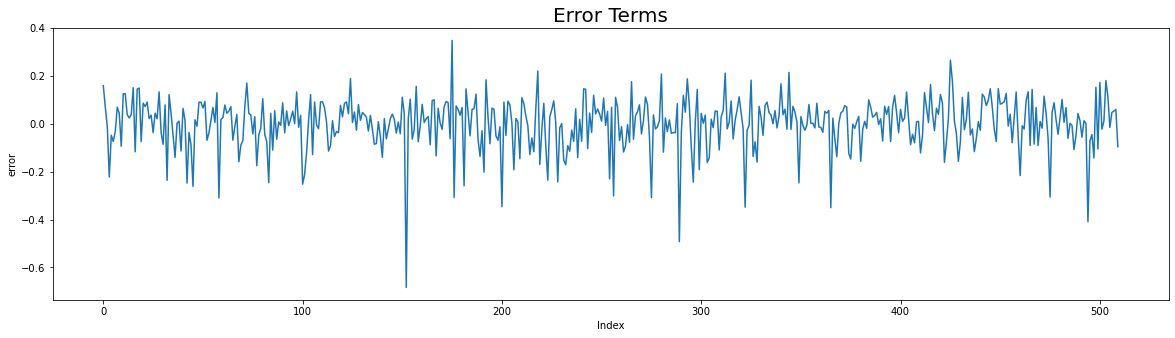

In [160]:
#Checking for error terms are independent of each other

x = [i for i in range(0,len(X_train),1)]
plt.figure(figsize=(20,5))
plt.plot(x,y_train-y_train_pred)
plt.title('Error Terms', fontsize=20)
plt.xlabel('Index')
plt.ylabel('error')
plt.show()

From above plot, it is clear that error terms are independent of each other

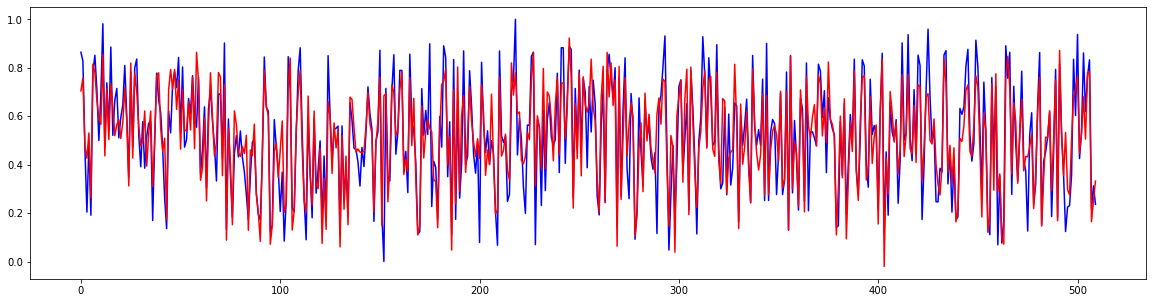

In [161]:
#Comaring the actual and predicted values of y_train

x = [i for i in range(0,len(X_train),1)]
plt.figure(figsize=(20,5))
plt.plot(x,y_train, color="blue")
plt.plot(x,y_train_pred, color="red")
plt.show()

We can observe that actual y_train and y_train_pred values are very close

## Making Predictions on test data using the model

Apply scaling on the test data

In [162]:
df_test[num_var] = scaler.transform(df_test[num_var])

Dividing df_test into y_test and X_test

In [163]:
y_test = df_test.pop('cnt')
X_test = df_test

Making predictions on test data using the model

In [164]:
# creating X_test data frame 
X_test_new=X_test[train_col]

X_test_new=sm.add_constant(X_test_new)

y_test_pred=lr_model.predict(X_test_new)

## Model Evaluation

In [165]:
# calculating R-squared value for test data
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_test_pred)
print(r2)

0.7679754501802214


In [166]:
# calculating adj R-squared for test data

# n is number of rows in X_test_new
n = X_test_new.shape[0]

# Number of features (predictors, p)
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adjusted_r2

0.7337823586278329

### Comparison of train and test data

Test r2=0.767
Test adj.r2=0.733

Train r2=0.77
Train adjr2=0.767

The model seems to be good that can generalize very well for various data sets

Text(0, 0.5, 'y_pred')

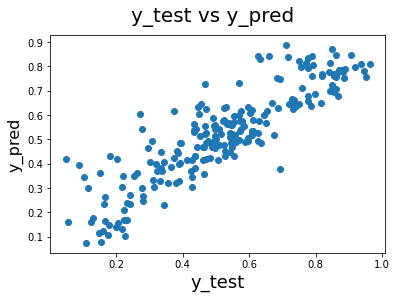

In [167]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)                  
plt.ylabel('y_pred', fontsize = 16) 

Our final model is

cnt = 0.0472 + 0.2374 * yr - 0.0885 * holiday + 0.5795 * temp + 0.0803 * season_summer + 0.1245 * season_winter  + 0.0978 * mnth_sept -0.0634 * wathersit_moderate 

In our model,

Features 'temp', 'yr', 'season_winter' are top pridictor variables along with other variables mentioned in the model.

So, bike share managemanet can use this model to predict demand and plan accordingly to improve the customer services and meet the demand